In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import gaitFunctions
import plotClip

In [3]:
# navigate to directory that contains the data
os.chdir('/Users/iwoods/OneDrive - Ithaca College/movement_disorder_paper_2023/videos_exemplaris/analyses_summaries/')
for f in sorted(glob.glob('*.xlsx')):
    print(f)

all_exemplaris_through_9Nov23_combined.xlsx
iw_9Nov23_exemplaris_inverted_combined.xlsx


In [4]:
# specify the data file
data_file = 'iw_9Nov23_exemplaris_inverted_combined.xlsx'

# Nirody Figure 1

In [5]:
'''
Nirody figure 1A, 1B ... tardigrade size
they report body length 350.40 ± 46.04 (standard deviation)
n = 43 tardigrades

the tardigrade they show in 1B looks like a young one, with no eggs . . . 
but ours are smaller?
''' 

# load the path summaries data into a dataframe
path_df = pd.read_excel(data_file, sheet_name='path_summaries', index_col=None)
num_tardigrades = len(path_df.individual.values)
body_lengths = path_df['Body Length (mm)'].values * 1000
body_length = np.round(np.mean(body_lengths),2)
body_length_sd = np.round(np.std(body_lengths),2)

print('n = ' + str(num_tardigrades) + ' tardigrades')
print('body length = ' + str(body_length) + ' ± ' + str(body_length_sd) + ' µm')


n = 14 tardigrades
body length = 226.24 ± 34.05 µm


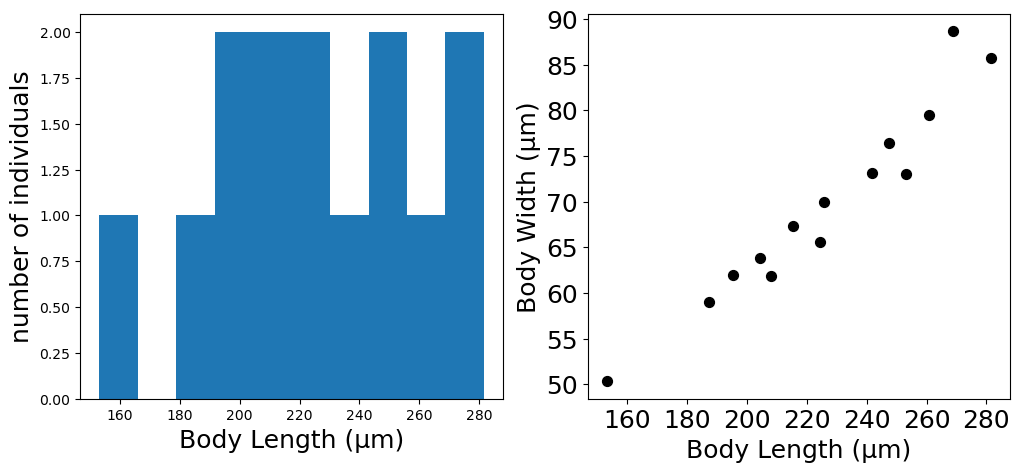

In [6]:
# more about size ... 
f,(a1,a2) = plt.subplots(1,2,figsize=(12,5))
a1.hist(body_lengths)
a1.set_ylabel('number of individuals',fontsize=18)
a1.set_xlabel('Body Length (µm)', fontsize=18)
body_widths = path_df['Body Width (mm)'].values * 1000
a2.scatter(body_lengths,body_widths,s=50,c='k')
a2.set_ylabel('Body Width (µm)',fontsize=18)
a2.set_xlabel('Body Length (µm)',fontsize=18)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

# Looking at size differences
Sizes are different between Nirody paper and our analyses ... <br>

Re-check our size measurements: <br>

On images from the Amscope inverted scope with MD310B camera, capturing images at 1024x768.<br>
Measuring micrometer via Python = <br>
* about 957 pixels (956 on 8 Dec, 948 on 12 Dec, 957 on 14 Dec, 958 on 30 Jan, 955 on 1 Feb)<br>
* Confirmed these values on Preview app, Confirmed on FIJI<br><br>

Selected three tardigrades from 9Nov23 (AmScope) <br>
to measure pixels in FIJI and compare to PYTHON-calculated values:<br>
* iw_9Nov_tardigrade01_exemplaris_033-060_first  145 pix = 151.67 µm (FIJI) vs. 155.98 µm (path_stats)
* iw_9Nov_tardigrade02_exemplaris_080-087_first  230 pix = 240.58 µm (FIJI) vs. 253.72 µm (path_stats)
* iw_9Nov_tardigrade04_exemplaris_097-117_first  261 pix = 273.01 µm (FIJI) vs. 280.70 µm (path_stats)
<br>

On images from the Te-Wen inverted scope with Te-Wen camera, capturing images at 1920x1080.<br>
Measuring micrometer via Python = <br>
* about 1633 pixels (1637 in adults_15Sep, 1631 in babies_15Sep, 1633 in adults_28Nov)
* Confirmed these values on Preview app, Confirmed on FIJI<br><br>

Selected three tardigrades from 28Nov23 (Te-Wen Scope and camera) <br> 
to measure pixels in FIJI and compare to PYTHON-calculated values:<br>
* ea_16jul_tardigrade37A-day4_050-068_first  229.12 pix = 140.30 µm (FIJI) vs. 144.04 µm (path_stats)
* ea_28nov_exemplaris_tardigrade15_027-035_first  497.29 pix = 304.52 µm (FIJI) vs. 289.14 µm (path_stats)
* gi_15sep_tardigrade8_041-070_first  341.71 pix = 209.25 µm (FIJI) vs. 201.17 µm (path_stats)

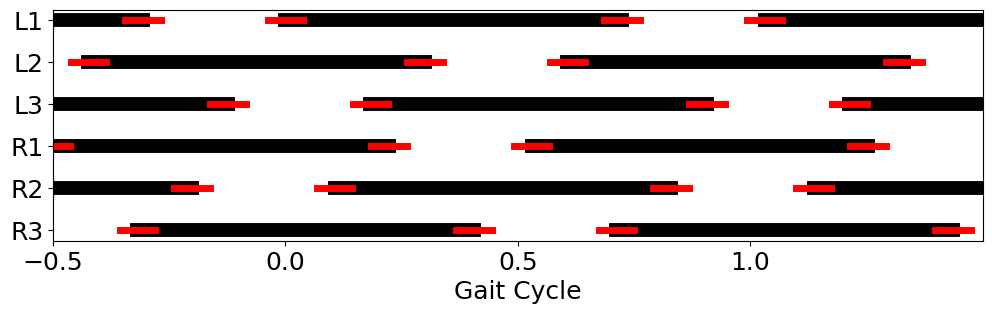

In [10]:
'''
Nirody figure 1C ... podogram
red bars show std of stance duration and swing duration

The code below will make a podogram from the step_summaries sheet,
which contains average data for all lateral legs and for rear legs.
''' 
plot_order = ['R3','R2','R1','L3','L2','L1']

# load the step_summaries data into a dataframe
step_summaries_df = pd.read_excel(data_file, sheet_name='step_summaries', index_col=None)
stances = step_summaries_df['Stance duration (lateral legs)'].values / step_summaries_df['Gait cycle (lateral legs)'].values
swings = step_summaries_df['Swing duration (lateral legs)'].values / step_summaries_df['Gait cycle (lateral legs)'].values
gait_cycles = step_summaries_df['Gait cycle (lateral legs)'].values
ipsilateral_offset_mean = np.mean(step_summaries_df['Anterior swing offsets (normalized, lateral legs)'].values)
contralateral_offset_mean = np.mean(step_summaries_df['Opposite swing offsets (normalized, lateral legs)'].values)

stances_mean = np.mean(stances)
stances_std = np.std(stances)
swings_mean = np.mean(swings)
swings_std = np.std(swings)
gait_cycle_mean = np.mean(gait_cycles)

# get leg offsets for plot
leg_offsets = {}
for i, leg in enumerate(['R3','R2','R1']):
    leg_offsets[leg] = i * ipsilateral_offset_mean
for leg in ['R3','R2','R1']:
    contralateral_leg = 'L' + leg[1:]
    leg_offsets[contralateral_leg] = leg_offsets[leg] + contralateral_offset_mean
start_leg = 'L1'
plot_leg_offsets = {}
for k,v in leg_offsets.items():
    plot_leg_offsets[k] = leg_offsets[k] - leg_offsets[start_leg]

# set up plot
f,a = plt.subplots(1, figsize = (12,3))

# it looks like Nirody is plotting data for each leg separately (e.g. the error bars are different)
# should we do that? Or get data for each leg and plot independently?
# if we get data for each leg, how to deal with variation in step number between individual animals?
for i,leg in enumerate(plot_order):
    first_start = plot_leg_offsets[leg]
    for j in [-1,0,1,2]:
        start_stance = first_start + (j * gait_cycle_mean)
        end_stance = start_stance + stances_mean
        # plot stances
        plt.plot([start_stance,end_stance],[i,i],'k',linewidth=10)
        # plot stance errors
        plt.plot([end_stance-stances_std,end_stance+stances_std],[i,i],'r',linewidth=5)
        # plot swing_errors
        plt.plot([start_stance-swings_std,start_stance+swings_std],[i,i],'r',linewidth=5)

xlims = [-0.5,1.5]     
a.set_xlim(xlims)  
a.set_xlabel('Gait Cycle',fontsize=18)
a.set_xticks(np.arange(xlims[0],xlims[1],0.5))
a.set_yticks(np.arange(0,len(plot_order)))
a.set_yticklabels(plot_order)
plt.yticks(fontsize=18)
plt.xticks(fontsize=18)
plt.show()

In [40]:
'''
Nirody figure 1C ... podogram 
red bars show std of stance duration and swing duration

The code below will make a podogram from the step_timing sheet,
which contains data for each step for each leg for each individual

We will calculate average stance, swing, gait cycle values for each leg 
of individual animal, and then plot averages of these
''' 
plot_order = ['R3','R2','R1','L3','L2','L1']

# load the step_timing data into a dataframe
step_df = pd.read_excel(data_file, sheet_name='step_timing', index_col=None)
# print(step_df.head(3)) # testing

# for each individual, for each leg, get:
# number of steps, stance durations, swing durations, 
# store in dictionary: step_data[leg][parameter] = [mean values for each individual]
step_data = {}
individuals = sorted(np.unique(step_df['uniq_id'].values))
parameters = ['stance','swing','gait','duty','anterior_offsets','contralateral_offsets']

# set up empty dictionary
for leg in plot_order:
    step_data[leg] = {}
    for parameter in parameters:
        step_data[leg][parameter] = []

# get the data for each individual and each leg, and add average value to dictionary
for individual in individuals:
    # get slice of data for this individual
    individual_df = step_df[step_df['uniq_id'] == individual]
    for leg in plot_order:
        # get slice of data for this leg
        leg_df = individual_df[individual_df['legID']==leg]
        for parameter in parameters:

            # get data for this parameter for this leg for this individual
            parameter_data = leg_df[parameter].values

            # get mean value of this data ... 
            # need some care - some data contains nan
            # and some paramaters will have no data!
            if len(parameter_data) > 0 and np.any(~np.isnan(parameter_data)):
                mean_parameter_data = np.nanmean(parameter_data)
            else:
                mean_parameter_data = np.nan
            
            # append this mean value to the dictionary
            
            if parameter == 'stance':
                print(mean_parameter_data)

0.749375
0.867
0.8395714285714285
0.765
0.9607142857142856
0.952
0.4741000000000001
0.47409999999999997
0.47505263157894734
0.4947222222222222
0.47357894736842104
0.4658095238095238
0.5325
0.5349166666666666
0.5401666666666668
0.5122727272727273
0.5350833333333332
0.55275
0.6577500000000001
0.753
0.7825
0.65025
0.6987777777777777
0.7292222222222222
0.8702857142857143
0.9138333333333333
0.895857142857143
0.8786666666666666
0.9784285714285714
1.0251666666666666
0.5232
0.5827272727272726
0.5366666666666667
0.4839166666666668
0.48654545454545456
0.5046923076923077
0.6752999999999999
0.7813
0.7600909090909092
0.7362
0.8269
0.8965
0.6982222222222222
0.7722222222222224
0.7854444444444444
0.6647000000000001
0.6912222222222222
0.7484444444444445
0.5065454545454545
0.5878333333333333
0.6194545454545455
0.5152
0.5946363636363636
0.6388181818181818
0.8463999999999998
0.9268333333333333
1.0881666666666667
1.0174999999999998
0.9792
1.0331666666666668
0.6644545454545455
0.714
0.7282
0.651181818181818